## 2장
* 2-2 붓꽃 품종 예측하기 : 분류(정답이 주어진 데이터를 먼저 학습 후 미지의 정답을 예측하는 방식)사용

In [1]:
import sklearn
print(sklearn.__version__) #사이킷런의 버전 확인

1.6.1


In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩합니다. 
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다. 
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다. 
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다. 
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3) 

#가독성을 위해 numpy에서 DataFrame으로 변환

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [4]:
#train_test_split() : 학습 데이터와 테스트 데이터를 나눠줌. test_size=0.2이면, 20퍼의 테스트 데이터 샛, 80프로의 학습 데이터 셋으로 나눔. 조정 가능

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, 
                                                    test_size=0.2, random_state=11)

In [5]:
# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=11)

# .fit()으로 학습 수행 
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [6]:
#.predict()로 라벨값을 예측합니다. 
pred = dt_clf.predict(X_test)
print(pred)

[2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]


In [7]:
#정확도 측정을 위해 accuracy_score(실제 레이블 데이터 세트, 예측 레이블 데이터 세트) 활용.

from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9333


* 2-3 : 사이킷런 기반 프레임워크 익히기 

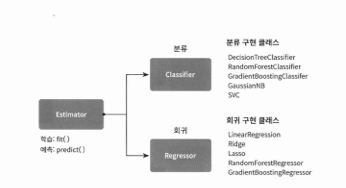

#교제 92, 93 참고

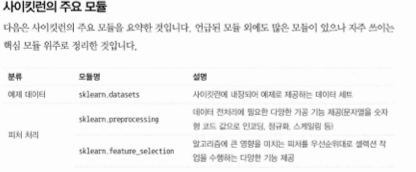 \
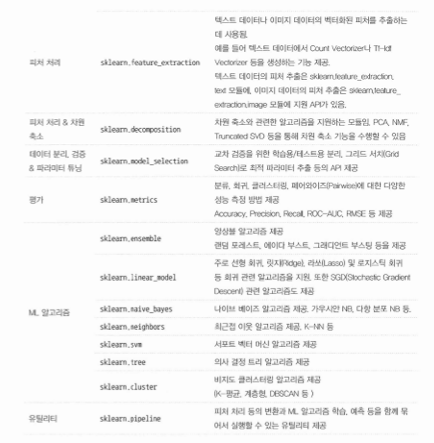

In [8]:
# datasets.make_classifications() : 분류를 위한 대이터 세트를 만듦.
# datasets.make_blobs() : 클러스터링을 위한 데이터 세트를 무작위 생성. 

In [9]:
# 데이터 세트의 키 값을 확인해보기

from sklearn.datasets import load_iris

iris_data = load_iris()

keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


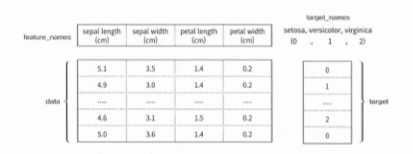

* 2-4 : Model Selection 모듈 소개

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier( )
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.3, random_state=121)


dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9556


앞선 방법은 overfitting 의 문제점을 가진다. overfittind이란, 모델이 학습 데이터에 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행 할 경우 성능이 과도하게 떨어지는 경우

#### 이를 해결하기 위해, 교차 검증을 사용 
교차 검증이란, 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서, 학습과 평가를 실행. 
최종 평가 전 검증 세트를 사용.
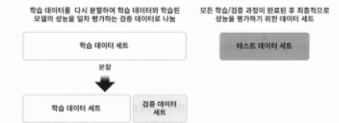

k 폴드 교차 검증
 K개의 데이터 폴드 세트를 만들어서, 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법.
 예시)K=5인 경우, \
 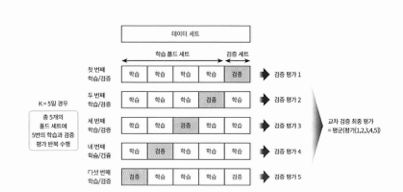 \
 5개의 예측 평가를 구했으면, 이를 평균해서 K폴드 평가 결과로 반영

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold #사이킷런은 Kfold 지원
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5) 
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',features.shape[0])
#120개의 학습데이터, 30개의 검증데이터

붓꽃 데이터 세트 크기: 150


In [12]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
for train_index, test_index in kfold.split(features): 
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    #print(train_index)
    
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


### stratified K 폴드 : 불 균형한 분포도를 가진 레이블 데이터 집합일 때 사용하는 K폴드 
예시 : 학습 dataset 에서 1이 80개, 0이 20개 있을 때, K=5인 경우 \
train_data에 1이 80개, validation_data에 0이 20개인 경우가 된다면, 제대로 된 학습 및 예측을 할 수 없음  
따라서 원본 데이터의 레이블 분포를 고려한 후, 학습 및 검증 데이터 세트를 분배하는 것이 좋음.

In [13]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']): 
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
1    17
2    16
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
2    17
1    16
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    17
2    17
0    16
Name: count, dtype: int64


### 학습 레이블과 검증 레이블 데이터 값의 분포도가 거의 동일하게 할당이 되었음을 확인 가능.

In [15]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
for train_index, test_index  in skfold.split(features, label):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정 
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


## 더 간단히 하는 방법 : cross_val_score() : 폴드 세트 추출, 학습/예측, 평가를 한번에 수행

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 3개 
scores = cross_val_score(dt_clf , data , label , scoring='accuracy',cv=3) #startified KFold로 진행
print(scores, type(scores))
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

[0.98 0.94 0.98] <class 'numpy.ndarray'>
교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


cross_val_score()는  단 하나의 평가 지표만 가능하지만, cross_validate()는 여러 개의 평가 지표 반환 가능. 또한, 학습 데이터에 대한 성능 평가 지표와 수행 시간도 같이 제공 \
아래는 gemini를 활용하여 만든 예시입니다. 

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate  # cross_validate 임포트
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

# 1. 데이터 및 모델 준비
iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 2. cross_validate 실행
# - scoring='accuracy': 정확도로 평가
# - cv=3: 3등분 (분류이므로 자동으로 Stratified KFold 적용됨)
# - return_train_score=True: 훈련 데이터 점수도 반환 (과적합 확인용)
scores = cross_validate(dt_clf, data, label, scoring='accuracy', cv=3, return_train_score=True)

# 3. 결과 확인 (딕셔너리 형태)
print('반환된 타입:', type(scores)) # <class 'dict'>
print('-' * 40)

# 4. 가독성을 위해 DataFrame으로 변환하여 출력
df_scores = pd.DataFrame(scores)
print(df_scores)
print('-' * 40)

# 5. 최종 평균 정확도 계산 (test_score 기준)
mean_score = np.mean(scores['test_score'])
print('평균 검증 정확도:', np.round(mean_score, 4))

반환된 타입: <class 'dict'>
----------------------------------------
   fit_time  score_time  test_score  train_score
0  0.000730    0.000431        0.98          1.0
1  0.000601    0.000368        0.94          1.0
2  0.000595    0.000349        0.98          1.0
----------------------------------------
평균 검증 정확도: 0.9667


* GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에 가능. (K-Fold를 이용한다)

## gemini 설명

1. max_depth: [1, 2, 3]

"질문을 최대 몇 단계까지만 파고들 것인가?"

나무의 **높이(층수)**를 결정합니다.

비유: 스무고개 게임에서 **"질문 기회"**의 횟수입니다.

값의 의미:

1: 질문 딱 1개만 하고 맞출게. (너무 단순함)

2: 질문 2개까지만 허용.

3: 질문 3개까지 허용.

왜 조절하나요?

깊이가 너무 깊어지면(10, 20...), 모델이 데이터 하나하나를 다 외워서 **과적합(Overfitting)**됩니다. 반대로 너무 얕으면(1) **과소적합(Underfitting)**되어 아무것도 못 맞춥니다.

GridSearch를 통해 "붓꽃 데이터는 깊이 3 정도면 충분한지, 아니면 2로도 되는지" 확인하려는 것입니다.

2. min_samples_split: [2, 3]

"남은 데이터가 몇 개 이상일 때만 쪼갤(질문할) 것인가?"

나무가 가지를 칠 때, **"이 정도 인원은 모여 있어야 쪼개지, 너무 적으면 그냥 멈춰!"**라고 정하는 기준입니다.

비유: 조별 과제를 하려고 반을 나누는데 **"최소 인원 제한"**을 두는 것과 같습니다.

값의 의미:

2: "데이터가 2개만 있어도, 걔네를 또 쪼갤 수 있으면 쪼개봐." (끝까지 파고듦, 디테일함)

3: "데이터가 3개는 있어야 쪼개지. 만약 2개밖에 안 남았으면? 더 이상 쪼개지 말고 그냥 거기서 결론 내!" (적당히 멈춤, 뭉뚱그림)

왜 조절하나요?

이 숫자가 작을수록(2) 모델은 더 집요하게 파고듭니다.

이 숫자가 클수록(3, 10...) 모델은 웬만하면 쪼개지 않고 멈춥니다(가지치기). 이것 역시 과적합을 막기 위한 브레이크입니다.

정리: GridSearchCV는 무슨 짓을 하는가?

이 코드는 총 6가지(3 x 2) 경우의 수를 다 실험해보겠다는 뜻입니다.

깊이 1 + 최소샘플 2 (단순하면서 집요함)

깊이 1 + 최소샘플 3 (단순하고 쿨함)

깊이 2 + 최소샘플 2

깊이 2 + 최소샘플 3

깊이 3 + 최소샘플 2 (복잡하면서 집요함)

깊이 3 + 최소샘플 3 (복잡하지만 적당히 멈춤)

**"이 6가지 조합 중에서 붓꽃 데이터를 분류하는 데 가장 성적이 좋은 조합(황금 비율)을 찾아내라!"**는 명령입니다.

In [18]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]} #반드시 dictionary 형태로 한 건이여도 리스트 형태로

In [19]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True, return_train_score=True) #refit 이란, 최적의 하이퍼파라미터값으로 estimator를 학습시킴.

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [20]:
grid_dtree.cv_results_ # 실험의 모든 상세 기록(시간, 폴드별 점수, 평균 점수 등)이 딕셔너리 형태로 들어감.

{'mean_fit_time': array([0.00048431, 0.00037368, 0.00045602, 0.00056307, 0.00050553,
        0.00041429]),
 'std_fit_time': array([8.91282364e-05, 3.16497608e-06, 4.57723658e-05, 1.34578694e-04,
        6.96721840e-05, 1.08567024e-05]),
 'mean_score_time': array([0.00030907, 0.00026464, 0.0003233 , 0.00030192, 0.00031583,
        0.000266  ]),
 'std_score_time': array([4.02531407e-05, 3.46049326e-06, 2.49440988e-05, 1.74489536e-05,
        3.75180925e-05, 8.82757109e-06]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_samples_split': 3},
  {'max_depth': 3, 'min_sample

In [21]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

#refit=True로 설정된 GridSearchCV 객체가 fit()을 수행 시 학습이 완료된 Estimator를 내포하고 있으므로 predict()를 통해 예측도 가능
pred = grid_dtree.predict(X_test) #(방법 1)
print('테스트 데이터세트 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750
테스트 데이터세트 정확도 : 0.9667


In [22]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환 (방법 2)
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667


* 2-5 데이터 전처리

### 데이터 인코딩 : 레이블 인코딩과 원-핫 인코딩
* 레이블 인코딩 : 카테고리 피처를 코드형 숫자값으로 변환하는 과정 \
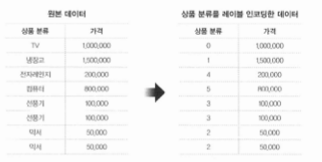

In [23]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder = LabelEncoder()
encoder.fit(items) #학습할때도, 변환할때도 fit() 사용
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

#fit transform 같이 사용할 수 있다
#labels = encoder.fit_transform(items) 
#print(labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [24]:
print('인코딩 클래스:',encoder.classes_) #.classes_ 를 통해 원본의 문자열값 알려줌.
print('디코딩 원본 값:',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3])) #.inverse_transform을 통해 숫자값을 문자값으로 변환

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본 값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


* 원-핫 인코딩 : 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 컬럼에는 0을 표시하는 방법 \
레이블 인코딩의 경우 특정 ML알고리즘에선 냉장고 1, 믹서기 2 일때 믹서 (2)에 더 큰 가중치를 부여하거나 중요하게 인식할 가능성이 있어 이를 방지하기 위해 사용
* 입력값으로 2차원의 데이터가 필요함.OneHotEncoder를 이용헤 변환한 값이 희소행렬이므로, toarray()를 사용해 밀집 행렬로 변환해야 함.

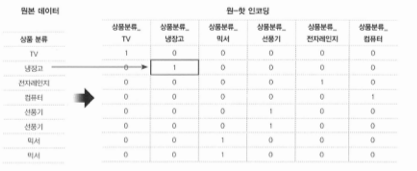

In [25]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 2차원 ndarray로 변환합니다. 
items = np.array(items).reshape(-1, 1)

# 원-핫 인코딩을 적용합니다. 객체만들고 fit -> transform
oh_encoder = OneHotEncoder()
oh_labels = oh_encoder.fit_transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환. 
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [26]:
# get_dummies를 이용하면 사이킷런의 OneHotEncoder과 다르게 문자형 카테고리 값을 숫자 형으로 변환할 필요 없이 바로 변환
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서'] })

ohe_df=pd.get_dummies(df, dtype = int)
display(ohe_df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


#### 피처 스케일링과 정규화

### 피처 스케일링과 정규화

* 피처 스케일링 : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
* 대표적인 방법으로 표준화(Standardizaion), 정규화(Normalization)이 있음.

* 표준화

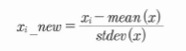 

* 정규화

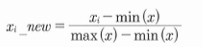

### StandardScaler : 표준화를 쉽게 지원하기 위한 클래스

In [27]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())


feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [28]:
from sklearn.preprocessing import StandardScaler 

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df) 

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean()) #0에 가까운 값
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


#### 알 수 있는 점 : 모든 컬럼의 평균 값이 0에 가까운 값으로, 분산은 1에 가까운 값으로 변환됨

### MinMaxScaler : 데이터 값을 0과 1 사이의 범위 값으로 변환 

In [29]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


## 주의점 : 
테스트 데이터에 다시 fit()을 적용하면 안 됨. 

즉 가능하디면 전체 데이터의 스케일링 후, 학습과 테스트 데이터로 분리.
테스트 데이터의 변환시에는 fit_transform이 아닌, 학습 데이터의 fit()을 사용하여 transform()만 사용하기. 

In [30]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [31]:
#올바른 예시

scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함. 
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))


원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


In [32]:
#잘못된 예시 

# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


### 6장 차원축소
* 6-1 차원축소의 개요 \
차원축소란 매우 많은 feature로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것으로 크게 피처 선택과 피처 추출로 나눈다


* 피처 선택 : 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것.
* 피처 추출 : 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것. (기존 피처와는 완전히 다른 값이 됨)
* 효과 : 과적합의 영향력이 작아져 원본 데이터로 예측하는 것보다 예측 성능을 더 끌어올림.


### 6-2 PCA 
  PCA란 여러 변수들 간 존재하는 상관 관계를 이용해, 이를 대표하는 주성분을 추출해 차원을 축소하는 기법. \
  높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소. \
  원본 데이터의 피처 개수에 비해, 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명 가능 \
    * 진행순서
  1) 입력 데이터 세트의 공분산 행렬을 생성 
  2) 공분산 행렬의 고유벡터와 고유 값을 계산 
  3) 고유값이 가장 큰 순으로 K만큼 고유벡터를 추출 
  4) 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새로운 입력데이터를 반환.

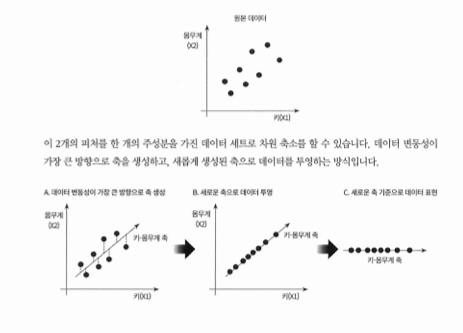

In [33]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


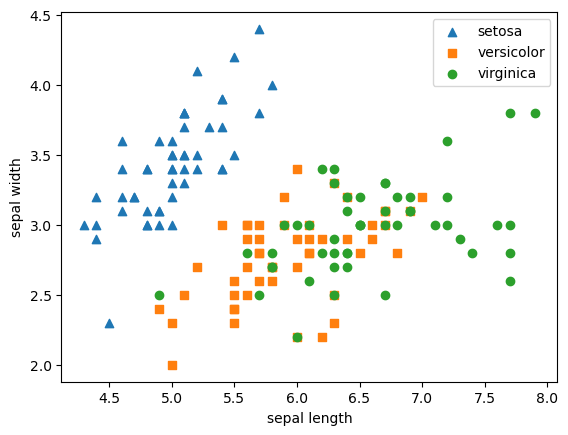

In [34]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [37]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


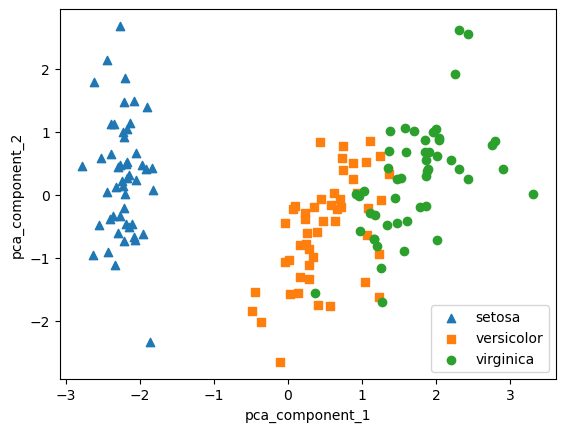

In [38]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [39]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [41]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


### 6-3 LDA
* PCA는 입력 데이터의 변동성이 가장 큰 축을 찾지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음
* 클래스 간 분산과 내부 분산의 비율을 최대화 하는 방식으로 차원 축소
* PCA와 다르게 지도학습!!!

  * 구하는 방법
    1) 클래스 내부와 클래스 간 분산행렬을 구함.
    2) 고유벡터로 분해
    3) 고유값이 큰 순으로 K개 추출
    4) 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환
 


In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [43]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


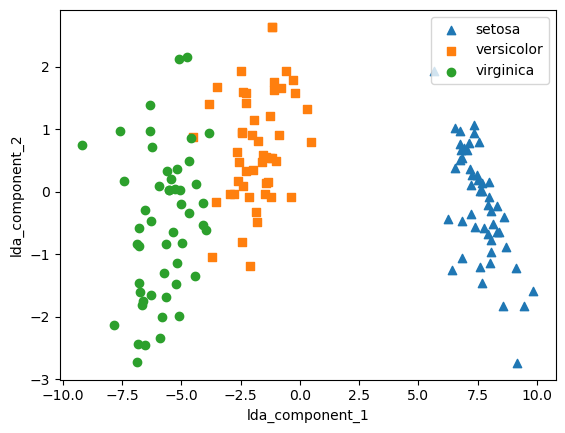

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

### 6-4 SVD : 특이값 분해
* PCA는 정방행렬만 고유벡터로 분리할 수 있지만, SVD는 행과 열이 크기가 다른 행렬에도 적용 가능
* Truncated SVD : 특이값 중 상위 일부 데이터만 추출해 분해하는 방식으로, 원본 행렬을 다시 원복할 수 없지만, 근사하게 표현됨

In [45]:
#넘파이버전


import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인 
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행. 
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

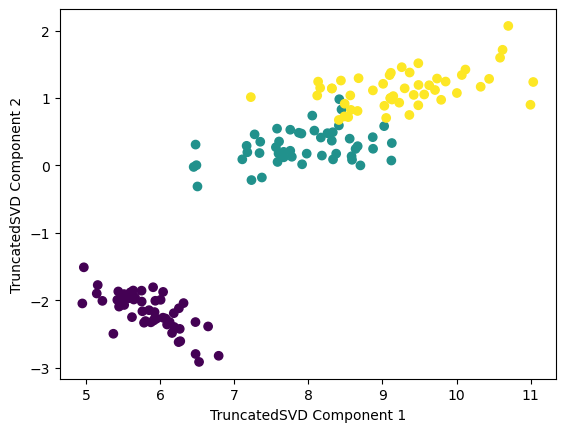

In [46]:
# 사이킷런 버전

from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
plt.show()

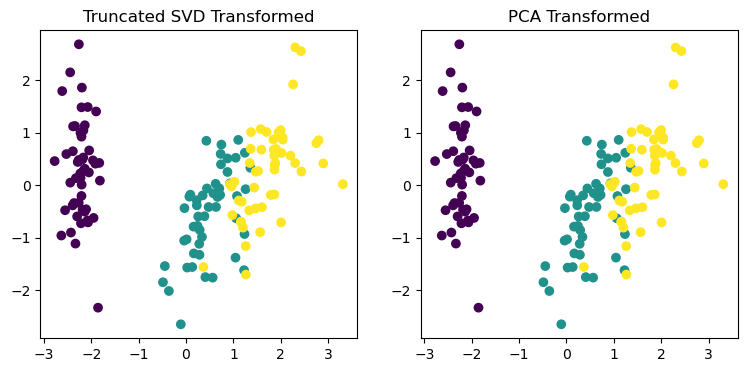

In [47]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')
plt.show()

### 6-5 NMF
* NMF란 원본 행렬 내의 모든 원소 값이 양수라는게 보장되면 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법 

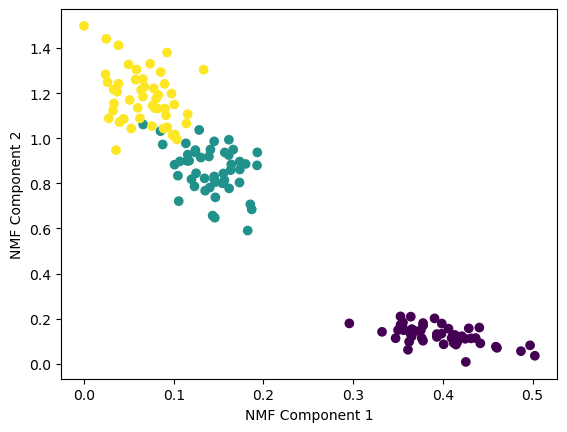

In [48]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

plt.show()